In [1]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline

In [2]:
data = pd.read_csv('./titanic-data/train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
npassengers = data.PassengerId.nunique()
psurvived = int(100 * data['Survived'].sum() / data.PassengerId.nunique())

print('Total passegers:', npassengers, 'Survived:', psurvived)

Total passegers: 891 Survived: 38


In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Заметим, что в датасете в 177 строках нет Age, в 687 строках нет Cabin и в 2 нет Embarked.
##### Это нужно будет учитывать при использовании данных параметров для анализа

#### Гипотеза 1: выживаемость зависела от гендера
##### Mужчины выживали чаще, чем женщины, так как дольше могли продержаться в воде?

In [17]:
# total number of males and females
data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [19]:
# show survival by sex
data[['Sex', 'Survived']].groupby(
    ['Sex']).mean().apply(lambda x: round(100 * x))

,Survived
Sex,
female,74.0
male,19.0


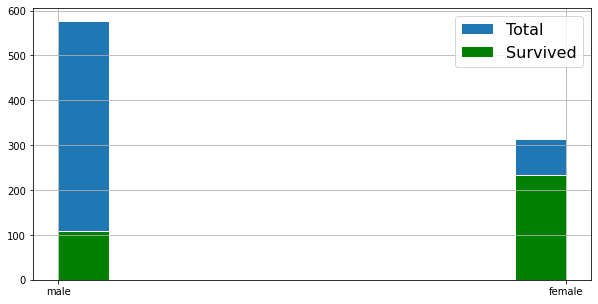

In [20]:
ax = data.Sex.hist(figsize=(10, 5), bins=10, edgecolor='white', grid=True)
data[data.Survived == 1].Sex.hist(figsize=(10, 5), bins=10,
                                  edgecolor='white', grid=True, color='green')
ax.legend(['Total', 'Survived'], prop={'size': 16})

#### Вывод
##### Гипотеза не верна. У женщин было почти в 4 раза выше шанс выжить, чем у мужчин

#### Гипотеза 2: выживаемость зависела от возраста
##### Стариков и детей выжило меньше, чем людей в молодом и среднем возрасте?

In [124]:
# Show age distribution in intervals of 5 years
minage = int(data.Age.min())
maxage = int(data.Age.max())

age_bins = pd.cut(data.Age, range(minage, maxage + 1, 5))
data.groupby(age_bins).Age.count()

Age
(0, 5]       44
(5, 10]      20
(10, 15]     19
(15, 20]     96
(20, 25]    122
(25, 30]    108
(30, 35]     88
(35, 40]     67
(40, 45]     47
(45, 50]     39
(50, 55]     24
(55, 60]     18
(60, 65]     14
(65, 70]      3
(70, 75]      4
(75, 80]      1
Name: Age, dtype: int64

##### Здесь не учитываются 177 пассажиров, у кого не было значения Age

Text(0, 0.5, 'Survival percentage')

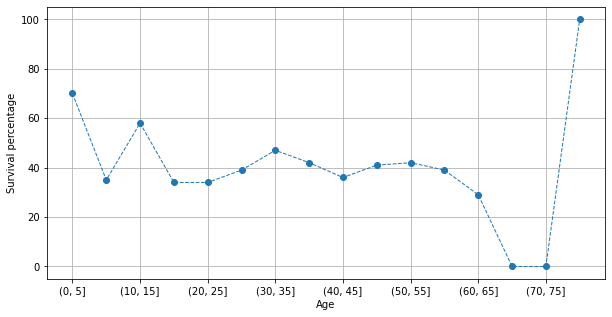

In [279]:
# Sirvaval percentage in age intervals
p = data.groupby(bins).Survived.mean().apply(lambda x: round(100 * x)).plot(
    figsize=(10, 5), grid=True, linestyle='--', marker='o', lw=1)

p.set_ylabel('Survival percentage')

#### Вывод
##### Больше всего пассажиров были в возрасте 20-30 лет, меньше всего - 65-80 лет. При этом наибольший шанс выжить имели дети в возрасте 0-5 лет (70%) и 10-15 лет (60%), наимеший - люди от 65 до 75 лет (не выжил никто). На борту был 1 человек в возрасте 80 лет, и он выжил, поэтому для этой группы шанс выжить - 100% - статистически не значимый.  Люди от 15 до 25 лет имели немного меньший шанс выжить (34%) по сравнению с людьми в возрасте от 25 до 55 лет (в среднем ~40%). Гипотеза частично не верна.

#### Гипотеза 3: выживаемость зависела от порта, в котором человек садился

In [313]:
data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

##### Заметим, что большинство пассажиров садились в порту S, поэтому добавим это значение пассажирам, у которых нет значения в этой колонке, т.к это меньше всего нарушит статистику

In [320]:
data.Embarked.fillna("S", inplace=True)

data.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [321]:
# percentage of passengers by port
(100 * data.Embarked.value_counts() / data.PassengerId.nunique()
 ).apply(lambda x: '{} %'.format(round(x)))

S    73 %
C    19 %
Q     9 %
Name: Embarked, dtype: object

In [22]:
# show survival by port
data[['Embarked', 'Survived']].groupby(['Embarked']).mean().apply(
    lambda x: round(100 * x))

,Survived
Embarked,
C,55.0
Q,39.0
S,34.0


#### Вывод
##### Большинство пассажиров (73%) садились в порту Southhampton и при этом 34% из них выжили, что очень близко к среднему проценту выживших. Учитывая, что пассажиры из этого порта составляют большинство общего числа пассажиров, это означает что статистически порт сильно не влиял на выживаемость. Гипотеза не верна.

#### Гипотеза 4: выживаемость зависела от класса
##### Людей из 1 класса выжило больше, чем из 2 и 3?

In [25]:
# percentage of survived in each class

data[['Pclass', 'Survived']].groupby(
    ['Pclass']).mean().apply(lambda x: round(100 * x))

,Survived
Pclass,
1,63.0
2,47.0
3,24.0


#### Вывод
##### Среди пассажиров 1 класса почти в 3 раза больше выживших, чем в 1, и почти на 20% больше, чем во 2. Гипотеза верна.

#### Гипотеза 5: выживаемость зависела от класса и тарифа
##### Чем выше класс и тариф, тем было больше шанса выжить?

In [26]:
# get average fare for each class
f_mean_fare = data[(data.Pclass == 1)].Fare.mean()
s_mean_fare = data[(data.Pclass == 2)].Fare.mean()
t_mean_fare = data[(data.Pclass == 3)].Fare.mean()

# add HighFare col showing if passenger paid higher than average fare for his class
data['HighFare'] = np.where(
    ((data.Pclass == 1) & (data.Fare > f_mean_fare)) |
    ((data.Pclass == 2) & (data.Fare > s_mean_fare)) |
    ((data.Pclass == 3) & (data.Fare > t_mean_fare)),
    True,
    False)

high_fare_corr = data[['Pclass', 'HighFare', 'Survived']].groupby(
    ['Pclass', 'HighFare']).mean().apply(lambda x: round(100 * x))
high_fare_corr

Survived
Pclass HighFare          
1      False         57.0
       True          77.0
2      False         40.0
       True          56.0
3      False         23.0
       True          27.0

Text(0, 0.5, 'Survival percentage')

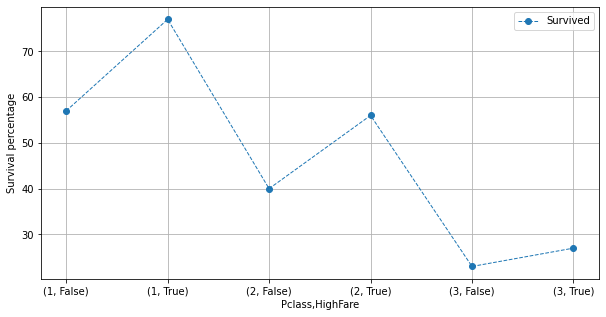

In [27]:
p = high_fare_corr.plot(figsize=(10, 5), grid=True,
                        linestyle='--', marker='o', lw=1)

p.set_ylabel('Survival percentage')

#### Вывод
##### Люди, заплатившие более высокий тариф, чем средний по классу, имели в среднем выше шанс выжить (примерно на 20% в 1 и во 2 классах). В 3 классе шанс был выше только на 3% (незначительно выше). Гипотеза в целом верна. Возможно, это объясняется тем, что более высокий тариф платили за кабины, расположенные ближе к команде корабяля/шлюпкам/дальше от скопления людей и проч.

#### Гипотеза 6: выживаемость зависела от класса и пола
##### Женщин в 1 классе выжило больше всего, мужчин в 3 классе - меньше всего

In [28]:
sex_class_corr = data[['Pclass', 'Sex', 'Survived']].groupby(
    ['Pclass', 'Sex']).mean().apply(lambda x: round(100 * x))
sex_class_corr

Survived
Pclass Sex             
1      female      97.0
       male        37.0
2      female      92.0
       male        16.0
3      female      50.0
       male        14.0

Text(0, 0.5, 'Survival percentage')

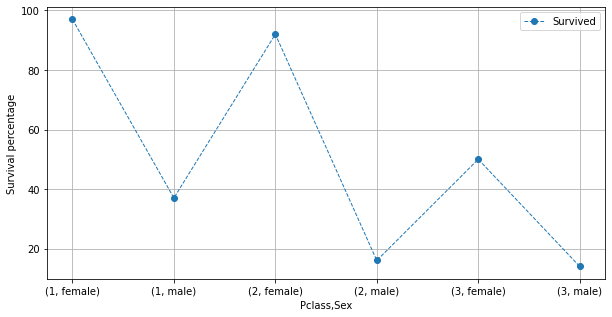

In [29]:
p = sex_class_corr.plot(figsize=(10, 5), grid=True,
                        linestyle='--', marker='o', lw=1)

p.set_ylabel('Survival percentage')

#### Вывод
##### Почти 100% женщин из 1 и 2 класса выжили. В 3 классе выжили 50% женщин - больше, чем дмужчин в 1 классе. Гипотеза верна. Мужчин из 2 и 3 класса выжило всего 16% и 14% соответственно. Гипотеза верна.

#### Гипотеза 7: выживаемость зависела от количества родственников на корабле
##### Чем больше родственников, тем выше шанс выжить?

In [30]:
data['Family'] = data['SibSp'] + data['Parch']

family_corr = data[['Family', 'Survived']].groupby(
    ['Family']).mean().apply(lambda x: round(100 * x))
family_corr

,Survived
Family,
0,30.0
1,55.0
2,58.0
3,72.0
4,20.0
5,14.0
6,33.0
7,0.0
10,0.0


Text(0, 0.5, 'Survival percentage')

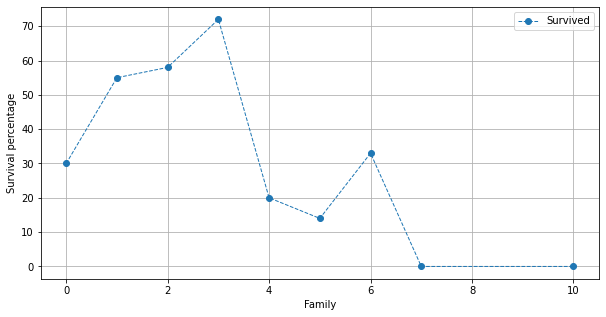

In [31]:
p = family_corr.plot(figsize=(10, 5), grid=True,
                     linestyle='--', marker='o', lw=1)

p.set_ylabel('Survival percentage')

#### Вывод
##### Наиболее высокий шанс (более 70%) выжить был у людей с 3 родственниками на борту. У людей с 1-2 родственниками - ниже на 10-15%, у остальных групп - значительно ниже. Погибли все пассажиры, у кого было 7-10 родственников. Гипотеза не верна.

#### Гипотеза 8: выживаемость зависела от количества и типа родственников на корабле
##### Людей с родителями и детьми (parch) выжило меньше, чем людей с супругами и сиблингами (sibsp)

<AxesSubplot:>

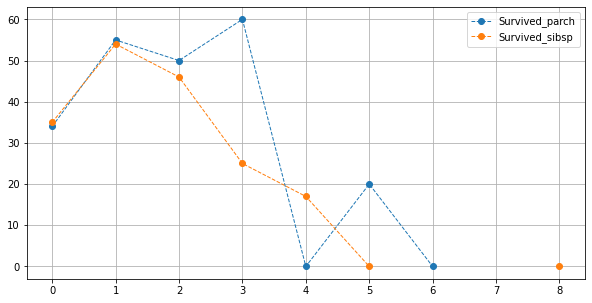

In [32]:
parch_corr = data[['Parch', 'Survived']].groupby(
    ['Parch']).mean().apply(lambda x: round(100 * x)).reset_index()
sibsp_corr = data[['SibSp', 'Survived']].groupby(
    ['SibSp']).mean().apply(lambda x: round(100 * x)).reset_index()
parch_corr.set_index('Parch').join(sibsp_corr.set_index('SibSp'), how='outer', lsuffix='_parch',
                                   rsuffix='_sibsp').plot(figsize=(10, 5), grid=True, linestyle='--', marker='o', lw=1)

#### Вывод
##### У людей без детей/родителей и супругов/сиблингов на корабле был одинаковый шанс выжить - около 35%. Также примерно одинаковый шанс выжить был у пассажиров с 1 или 2 типами родственников. Наиболее различные шансы выжить были у людей с 3 детьми или родителями (и наиболее высокий из всех) - 60% по сравнению с 25% у пассажиров с 3 сиблингами и супругом. В целом людей с родителями/детьми выжило больше, чем с сиблингами и супругами. Учитывыая предыдущие гипотезы это может быть объяснено тем, что спасали в первую очередь детей. Гипотеза неверна.

#### Общий вывод: выжили преимущественно дети и женщины, причем у женщин из 1 и 2 класса был почти 100% шанс выжить, у детей от 0 до 15 лет - 60-70%. Для большинства остальных пассажиров средний шанс выжить был около 40%. Чем выше класс и тариф пассажира, тем больше был шанс выжить. Также в среднем больше выжило людей с небольшим количеством родственников - от 0 до 3.
##### Более подробные описания каждого пункта вывода представлены под каждой гипотезой.